In [22]:
import pandas as pd

df = pd.read_csv('df_cleaned.csv')
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [21]:
#df = df.drop('customerID', axis=1)
#df.head()

In [6]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns
print("Categorical columns:")
print(categorical_cols)

# Identify binary columns (assuming binary columns have only two unique values)
binary_cols = [col for col in categorical_cols if df[col].nunique() == 2]
print("\nBinary columns:")
print(binary_cols)

# Identify columns for one-hot encoding (categorical columns excluding binary ones)
one_hot_cols = [col for col in categorical_cols if col not in binary_cols]
print("\nColumns for one-hot encoding:")
print(one_hot_cols)

Categorical columns:
Index([], dtype='object')

Binary columns:
[]

Columns for one-hot encoding:
[]


In [15]:
# Encode binary columns
for col in binary_cols:
    if col == 'gender':
        df[col] = df[col].map({'Female': 0, 'Male': 1})
    elif col == 'Churn':
        df[col] = df[col].map({'No': 0, 'Yes': 1})
    else:
        df[col] = df[col].map({'No': 0, 'Yes': 1})

df.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,1,9,1,1,65.6,593.30,...,1,0,0,0,1,0,0,0,0,1
1,0,1,0,0,0,9,1,0,59.9,542.40,...,0,0,1,1,0,0,0,0,0,1
2,1,1,0,0,0,4,1,1,73.9,280.85,...,1,0,0,1,0,0,0,0,1,0
3,1,1,1,1,0,13,1,1,98.0,1237.85,...,0,0,1,1,0,0,0,0,1,0
4,1,0,1,1,0,3,1,1,83.9,267.40,...,1,0,0,1,0,0,0,0,0,1


In [14]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Initialize OneHotEncoder
# handle_unknown='ignore' will allow encoding unseen categories during transform
# sparse_output=False will return a dense numpy array instead of a sparse matrix
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform the selected columns
encoded_data = onehot_encoder.fit_transform(df[one_hot_cols])

# Create a DataFrame from the encoded data with appropriate column names
encoded_df = pd.DataFrame(encoded_data, columns=onehot_encoder.get_feature_names_out(one_hot_cols))

# Drop the original one-hot encoded columns from the main DataFrame
df = df.drop(columns=one_hot_cols)

# Concatenate the original DataFrame with the new one-hot encoded DataFrame
df = pd.concat([df, encoded_df], axis=1)

df.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,1,9,1,1,65.6,593.30,...,1,0,0,0,1,0,0,0,0,1
1,0,1,0,0,0,9,1,0,59.9,542.40,...,0,0,1,1,0,0,0,0,0,1
2,1,1,0,0,0,4,1,1,73.9,280.85,...,1,0,0,1,0,0,0,0,1,0
3,1,1,1,1,0,13,1,1,98.0,1237.85,...,0,0,1,1,0,0,0,0,1,0
4,1,0,1,1,0,3,1,1,83.9,267.40,...,1,0,0,1,0,0,0,0,0,1


In [9]:
# Calculate the count of each class in the 'Churn' column
churn_counts = df['Churn'].value_counts()

# Calculate the proportion of each class
churn_proportions = df['Churn'].value_counts(normalize=True) * 100

print("Distribution of Churn:")
print(churn_counts)
print("\nProportion of Churn (%):")
print(churn_proportions)

# Evaluate for imbalance
if churn_proportions.min() < 25:  # A common heuristic for imbalance
    print("\nThere appears to be a class imbalance in the 'Churn' column.")
else:
    print("\nThere does not appear to be significant class imbalance in the 'Churn' column based on a 25% threshold.")

Distribution of Churn:
Churn
0    5163
1    1869
Name: count, dtype: int64

Proportion of Churn (%):
Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64

There does not appear to be significant class imbalance in the 'Churn' column based on a 25% threshold.


In [13]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df['Churn'] == 0]
df_minority = df[df['Churn'] == 1]

# Downsample majority class
df_majority_downsampled = resample(df_majority,
                                   replace=False,    # sample without replacement
                                   n_samples=len(df_minority), # to match minority class size
                                   random_state=123) # reproducible results

# Concatenate minority and downsampled majority class
df_balanced_undersample = pd.concat([df_majority_downsampled, df_minority])

# Display new class counts
print("Class distribution after undersampling:")
print(df_balanced_undersample['Churn'].value_counts())

df_balanced_undersample.head()

Class distribution after undersampling:
Churn
0    1869
1    1869
Name: count, dtype: int64


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5439,0,0,1,1,0,17,1,1,92.55,1614.70,...,0,0,1,1,0,0,0,0,1,0
4876,0,1,0,0,0,1,1,1,50.70,50.70,...,1,0,0,1,0,0,0,0,0,1
2578,0,0,0,0,0,5,1,1,19.65,92.05,...,0,1,0,1,0,0,0,1,0,0
6033,0,1,0,1,0,40,1,1,106.00,4178.65,...,0,0,1,0,1,0,1,0,0,0
6282,0,1,0,0,1,2,1,1,55.30,108.65,...,0,0,1,1,0,0,0,0,1,0


In [12]:
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y)
X = df_balanced_undersample.drop('Churn', axis=1)
y = df_balanced_undersample['Churn']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Create a new DataFrame with scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# You can optionally add the target variable back for a complete scaled dataset
df_scaled = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1)

df_scaled.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,Contas_Diarias,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,-1.002142,2.094318,1.123095,-0.583735,-0.431792,0.324946,0.754936,0.859129,-0.185699,0.859129,...,-0.446352,1.207308,0.708810,-0.449365,-0.446783,-0.476215,-0.494727,1.201306,-0.514341,0
1,0.997862,-0.477482,-0.890396,-0.583735,-1.101187,0.324946,0.754936,-0.590893,-0.904483,-0.590893,...,-0.446352,-0.828289,0.708810,-0.449365,-0.446783,-0.476215,-0.494727,-0.832427,1.944235,0
2,-1.002142,-0.477482,-0.890396,-0.583735,-0.933838,0.324946,0.754936,-1.666715,-0.885479,-1.666715,...,2.240385,-0.828289,0.708810,-0.449365,-0.446783,-0.476215,2.021315,-0.832427,-0.514341,0
3,0.997862,-0.477482,1.123095,-0.583735,0.530464,0.324946,0.754936,1.325145,0.992642,1.325145,...,-0.446352,1.207308,-1.410815,2.225360,-0.446783,2.099893,-0.494727,-0.832427,-0.514341,0
4,0.997862,-0.477482,-0.890396,1.713107,-1.059349,0.324946,0.754936,-0.431512,-0.877850,-0.431512,...,-0.446352,1.207308,0.708810,-0.449365,-0.446783,-0.476215,-0.494727,1.201306,-0.514341,0


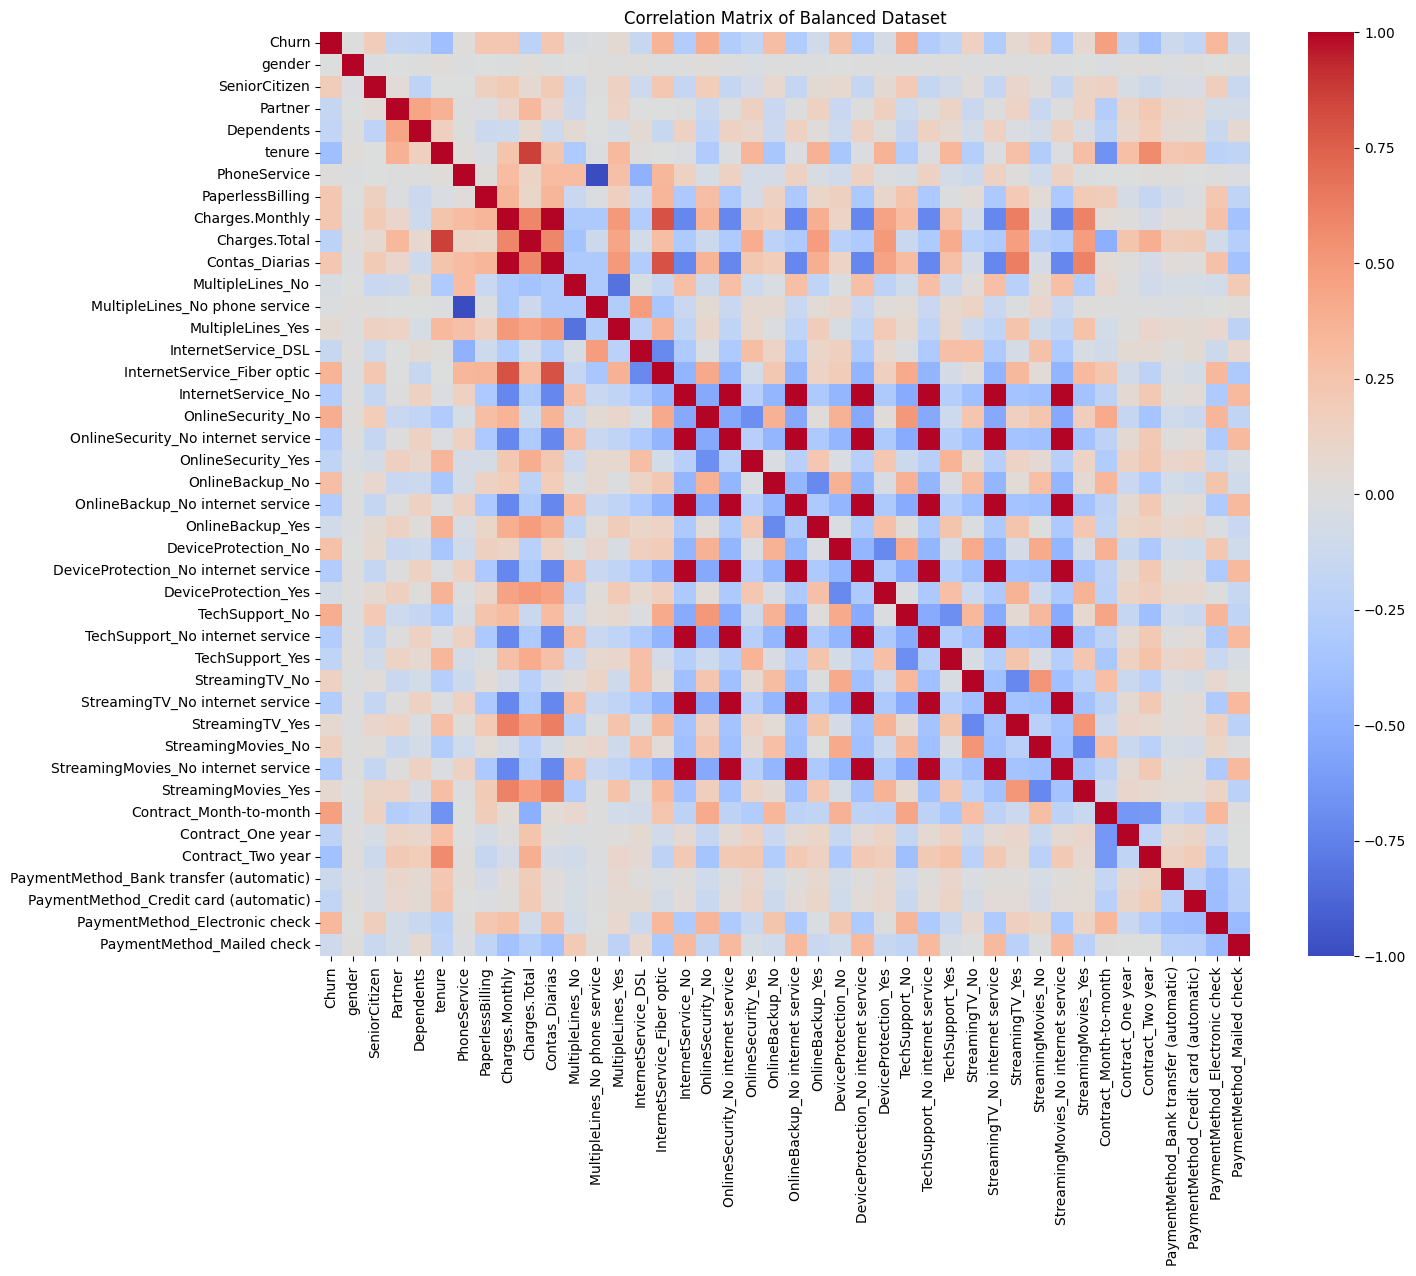


Correlation with Churn:
Churn                                      1.000000
Contract_Month-to-month                    0.466113
TechSupport_No                             0.391920
OnlineSecurity_No                          0.390992
InternetService_Fiber optic                0.353344
PaymentMethod_Electronic check             0.332971
OnlineBackup_No                            0.296494
DeviceProtection_No                        0.267630
PaperlessBilling                           0.233101
Charges.Monthly                            0.231698
Contas_Diarias                             0.231698
SeniorCitizen                              0.177508
StreamingMovies_No                         0.151437
StreamingTV_No                             0.144724
StreamingTV_Yes                            0.069308
StreamingMovies_Yes                        0.062625
MultipleLines_Yes                          0.054067
PhoneService                               0.015474
gender                                 

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for the balanced dataset
correlation_matrix = df_balanced_undersample.corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Balanced Dataset')
plt.show()

# Display correlations with the 'Churn' column
print("\nCorrelation with Churn:")
print(correlation_matrix['Churn'].sort_values(ascending=False))

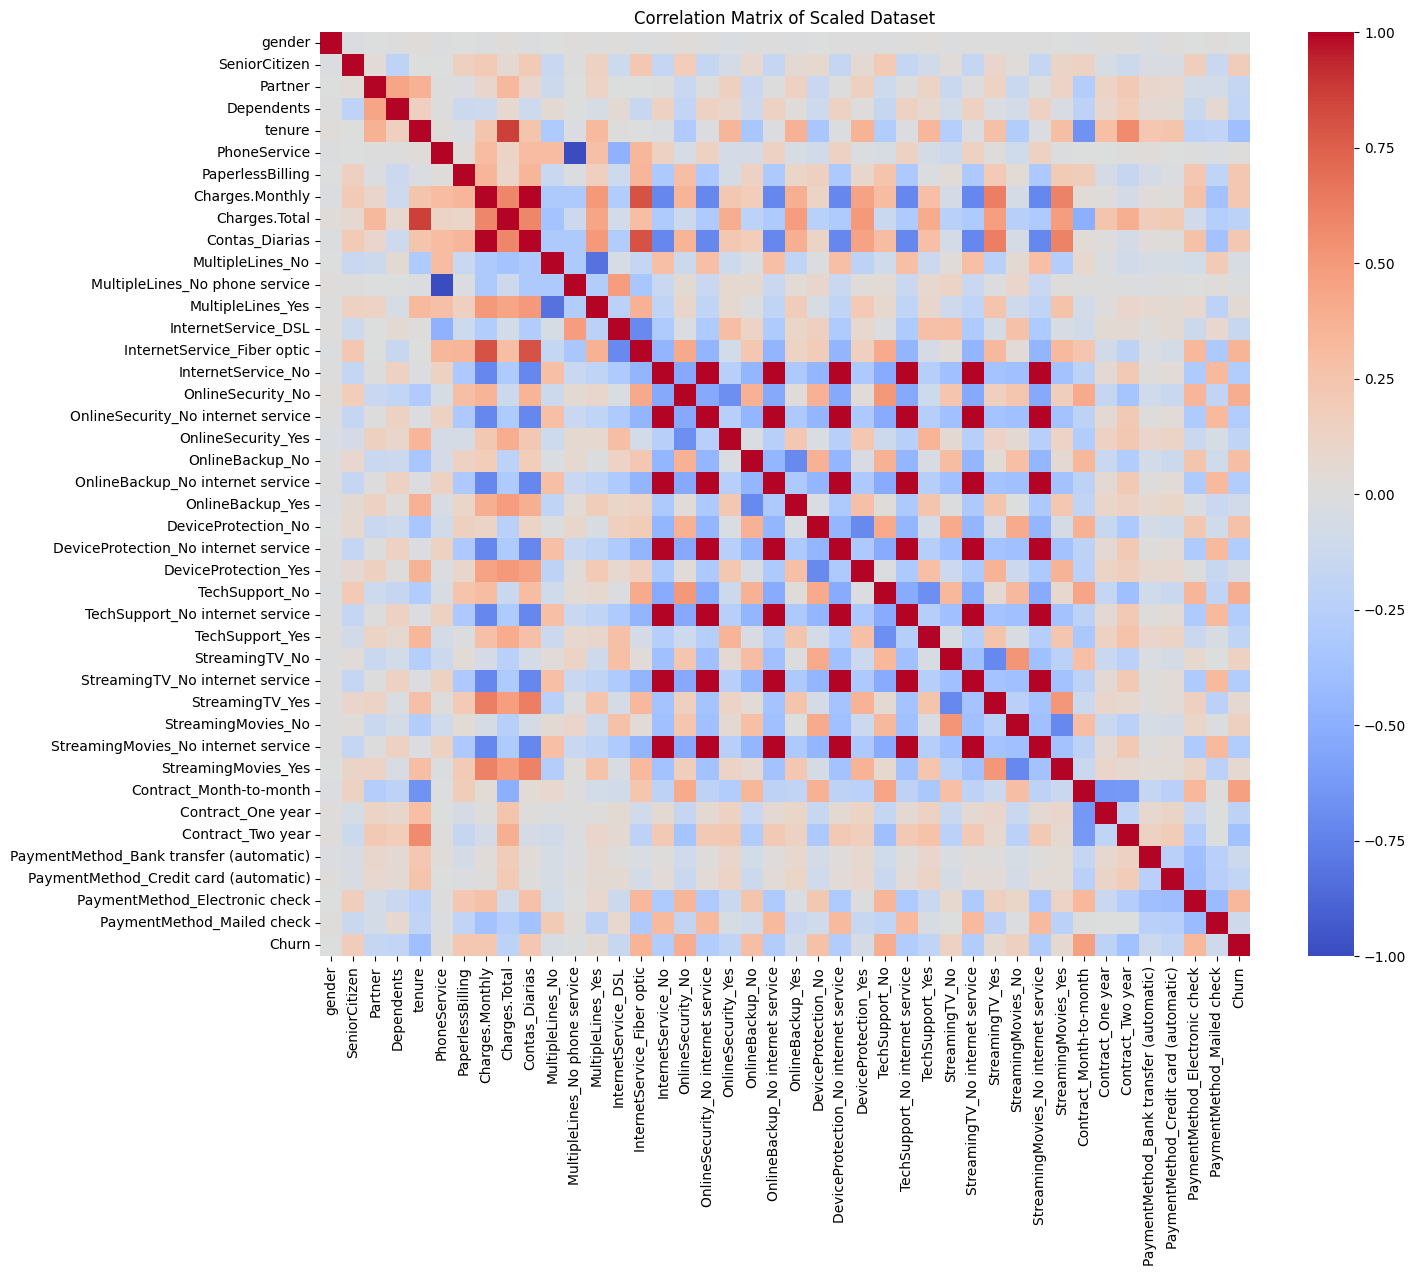


Correlation with Churn (Scaled Dataset):
Churn                                      1.000000
Contract_Month-to-month                    0.466113
TechSupport_No                             0.391920
OnlineSecurity_No                          0.390992
InternetService_Fiber optic                0.353344
PaymentMethod_Electronic check             0.332971
OnlineBackup_No                            0.296494
DeviceProtection_No                        0.267630
PaperlessBilling                           0.233101
Charges.Monthly                            0.231698
Contas_Diarias                             0.231698
SeniorCitizen                              0.177508
StreamingMovies_No                         0.151437
StreamingTV_No                             0.144724
StreamingTV_Yes                            0.069308
StreamingMovies_Yes                        0.062625
MultipleLines_Yes                          0.054067
PhoneService                               0.015474
gender                

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for the scaled dataset
correlation_matrix_scaled = df_scaled.corr()

# Plot the correlation matrix for the scaled dataset
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix_scaled, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Scaled Dataset')
plt.show()

# Display correlations with the 'Churn' column for the scaled dataset
print("\nCorrelation with Churn (Scaled Dataset):")
print(correlation_matrix_scaled['Churn'].sort_values(ascending=False))

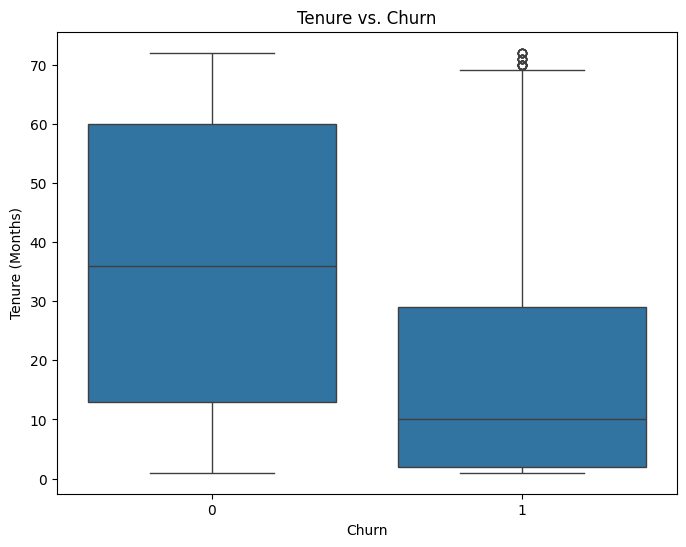

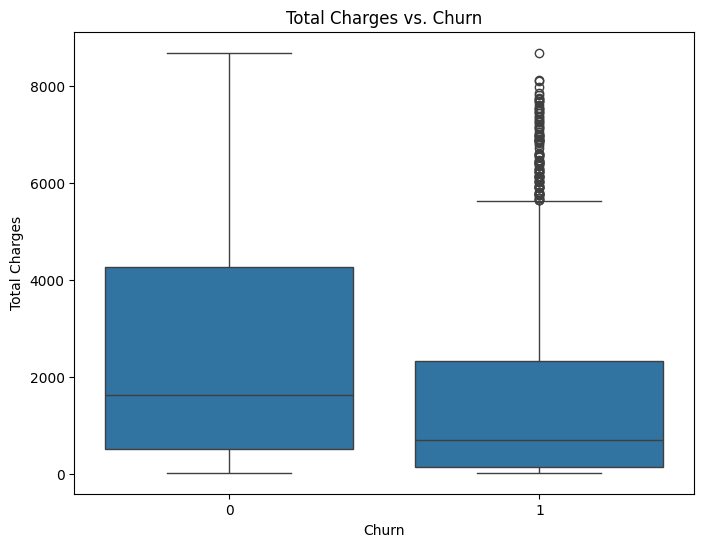

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot of Tenure vs. Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=df_balanced_undersample)
plt.title('Tenure vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure (Months)')
plt.show()

# Boxplot of Total Charges vs. Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Charges.Total', data=df_balanced_undersample)
plt.title('Total Charges vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y) from the scaled DataFrame
X_scaled = df_scaled.drop('Churn', axis=1)
y_scaled = df_scaled['Churn']

# Split the scaled data into training and testing sets (75% train, 25% test)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_scaled, y_scaled, test_size=0.25, random_state=42, stratify=y_scaled
)

print("Shapes of the scaled data splits:")
print("X_train_scaled:", X_train_scaled.shape)
print("X_test_scaled:", X_test_scaled.shape)
print("y_train_scaled:", y_train_scaled.shape)
print("y_test_scaled:", y_test_scaled.shape)

Shapes of the scaled data splits:
X_train_scaled: (2803, 41)
X_test_scaled: (935, 41)
y_train_scaled: (2803,)
y_test_scaled: (935,)


In [27]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y) from the balanced DataFrame
X_balanced = df_balanced_undersample.drop('Churn', axis=1)
y_balanced = df_balanced_undersample['Churn']

# Split the balanced data into training and testing sets (75% train, 25% test)
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_balanced, y_balanced, test_size=0.25, random_state=42, stratify=y_balanced
)

print("Shapes of the balanced data splits:")
print("X_train_balanced:", X_train_balanced.shape)
print("X_test_balanced:", X_test_balanced.shape)
print("y_train_balanced:", y_train_balanced.shape)
print("y_test_balanced:", y_test_balanced.shape)

Shapes of the balanced data splits:
X_train_balanced: (2803, 41)
X_test_balanced: (935, 41)
y_train_balanced: (2803,)
y_test_balanced: (935,)


### Justificativa para a Seleção dos Modelos e Normalização dos Dados

Para esta tarefa de previsão de evasão de clientes, optamos por explorar dois modelos de aprendizado de máquina distintos: **Regressão Logística** e **Random Forest**.

---

**1. Regressão Logística:**

* **Justificativa:** A Regressão Logística é um modelo linear simples, mas poderoso, amplamente utilizado para problemas de classificação binária, como a previsão de churn. Ela modela a probabilidade de um cliente desistir com base nas variáveis de entrada. Sua interpretabilidade facilita a compreensão do impacto de cada variável na probabilidade de evasão.
* **Necessidade de Normalização dos Dados:** Assim como outros modelos que dependem de cálculos de distância ou da otimização por gradiente descendente (por exemplo, Máquinas de Vetores de Suporte, K-Vizinhos Mais Próximos e Redes Neurais), a Regressão Logística é sensível à escala das variáveis de entrada. Variáveis com valores maiores podem dominar o processo de aprendizado, prejudicando o desempenho do modelo. **A normalização (ou padronização)** ajusta as variáveis para uma escala semelhante, garantindo que cada uma contribua proporcionalmente para o modelo e ajudando o algoritmo de otimização a convergir de forma mais eficiente. Utilizamos o `StandardScaler` para padronizar os dados, removendo a média e escalando para variância unitária.

---

**2. Random Forest:**

* **Justificativa:** O Random Forest é um método de aprendizado de conjunto que constrói múltiplas árvores de decisão e combina suas previsões. É conhecido por sua robustez, capacidade de lidar com relações não lineares e bom desempenho sem a necessidade de ajustes extensivos de hiperparâmetros. Como é um conjunto de modelos baseados em árvores, apresenta menor propensão ao overfitting em comparação com uma única árvore de decisão.
* **Necessidade de Normalização dos Dados:** O Random Forest **não é sensível à escala dos dados de entrada**. As árvores de decisão — que são a base do Random Forest — fazem divisões baseadas nos valores individuais das variáveis. Esses pontos de corte são definidos por comparações diretas com um limiar, e essa lógica não é afetada pela escala das variáveis. Portanto, a normalização ou padronização não é uma etapa necessária de pré-processamento para esse modelo.

---

Ao comparar o desempenho de um modelo linear (Regressão Logística) e de um modelo baseado em árvores (Random Forest), podemos entender melhor a natureza das relações nos dados e identificar qual abordagem é mais adequada para a tarefa de previsão de churn.

In [28]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Train the model using the scaled training data
logistic_model.fit(X_train_scaled, y_train_scaled)

print("Logistic Regression model trained successfully!")

Logistic Regression model trained successfully!


In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Make predictions on the scaled test data
y_pred_scaled = logistic_model.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_scaled, y_pred_scaled)
precision = precision_score(y_test_scaled, y_pred_scaled)
recall = recall_score(y_test_scaled, y_pred_scaled)
f1 = f1_score(y_test_scaled, y_pred_scaled)
conf_matrix = confusion_matrix(y_test_scaled, y_pred_scaled)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

print("\nConfusion Matrix:")
print(conf_matrix)

# Print the classification report for a more detailed view
print("\nClassification Report:")
print(classification_report(y_test_scaled, y_pred_scaled))

Accuracy: 0.7465
Precision: 0.7237
Recall: 0.7966
F1-score: 0.7584

Confusion Matrix:
[[326 142]
 [ 95 372]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.70      0.73       468
           1       0.72      0.80      0.76       467

    accuracy                           0.75       935
   macro avg       0.75      0.75      0.75       935
weighted avg       0.75      0.75      0.75       935



In [30]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Train the model using the balanced training data
random_forest_model.fit(X_train_balanced, y_train_balanced)

print("Random Forest model trained successfully!")

Random Forest model trained successfully!


In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Make predictions on the balanced test data
y_pred_balanced = random_forest_model.predict(X_test_balanced)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test_balanced, y_pred_balanced)
precision_rf = precision_score(y_test_balanced, y_pred_balanced)
recall_rf = recall_score(y_test_balanced, y_pred_balanced)
f1_rf = f1_score(y_test_balanced, y_pred_balanced)
conf_matrix_rf = confusion_matrix(y_test_balanced, y_pred_balanced)

# Print the evaluation metrics
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest Precision: {precision_rf:.4f}")
print(f"Random Forest Recall: {recall_rf:.4f}")
print(f"Random Forest F1-score: {f1_rf:.4f}")

print("\nRandom Forest Confusion Matrix:")
print(conf_matrix_rf)

# Print the classification report for a more detailed view
print("\nRandom Forest Classification Report:")
print(classification_report(y_test_balanced, y_pred_balanced))

Random Forest Accuracy: 0.7251
Random Forest Precision: 0.7100
Random Forest Recall: 0.7602
Random Forest F1-score: 0.7342

Random Forest Confusion Matrix:
[[323 145]
 [112 355]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.69      0.72       468
           1       0.71      0.76      0.73       467

    accuracy                           0.73       935
   macro avg       0.73      0.73      0.72       935
weighted avg       0.73      0.73      0.72       935



In [32]:
# Analyze variable importance for Logistic Regression (using coefficients)
# The coefficients indicate the change in the log-odds of churn for a one-unit increase in the feature.
# Larger absolute values of coefficients indicate greater importance.
logistic_coefficients = pd.Series(logistic_model.coef_[0], index=X_train_scaled.columns)
print("Logistic Regression Coefficients (Absolute Values):")
print(logistic_coefficients.abs().sort_values(ascending=False))

print("\n" + "="*50 + "\n")

# Analyze variable importance for Random Forest (using feature importances)
# Feature importances are calculated based on how much each feature reduces impurity across all trees.
random_forest_importances = pd.Series(random_forest_model.feature_importances_, index=X_train_balanced.columns)
print("Random Forest Feature Importances:")
print(random_forest_importances.sort_values(ascending=False))

Logistic Regression Coefficients (Absolute Values):
tenure                                     1.262852
Charges.Total                              0.590448
Contract_Two year                          0.280766
Contract_Month-to-month                    0.264288
PaperlessBilling                           0.178652
InternetService_Fiber optic                0.163866
InternetService_DSL                        0.150120
TechSupport_No                             0.130543
PaymentMethod_Electronic check             0.129617
TechSupport_Yes                            0.120352
SeniorCitizen                              0.113959
PaymentMethod_Mailed check                 0.106361
MultipleLines_No                           0.088681
OnlineSecurity_No                          0.087257
PaymentMethod_Credit card (automatic)      0.075513
OnlineSecurity_Yes                         0.071809
Partner                                    0.071745
OnlineBackup_No                            0.070468
Dependents  

### Análise de Importância das Variáveis

Após treinar os modelos de **Regressão Logística** e **Random Forest**, analisamos a importância de cada variável na previsão de evasão de clientes. Entender quais variáveis são mais influentes pode fornecer insights valiosos para o negócio e, potencialmente, orientar futuras coletas de dados ou estratégias de retenção de clientes.

---

**1. Regressão Logística – Analisando os Coeficientes:**

Na Regressão Logística, a importância das variáveis geralmente é avaliada examinando os coeficientes atribuídos a cada recurso.

* **Interpretação:** A magnitude do coeficiente de uma variável indica a força de sua relação com o logaritmo das chances (*log-odds*) de churn.

  * Um coeficiente positivo significa que, à medida que o valor da variável aumenta, o *log-odds* de evasão também aumenta (maior probabilidade de churn).
  * Um coeficiente negativo significa que, à medida que o valor da variável aumenta, o *log-odds* de evasão diminui (menor probabilidade de churn).
* **Implementação no Código:** Extraímos os coeficientes do `logistic_model` treinado e os associamos aos nomes das variáveis correspondentes. Em seguida, classificamos os valores absolutos desses coeficientes em ordem decrescente para destacar as variáveis com maior impacto, independentemente do sentido da relação.

---

**2. Random Forest – Analisando as Importâncias das Variáveis:**

No caso do Random Forest, o modelo fornece uma medida interna de importância das variáveis.

* **Interpretação:** A importância das variáveis no Random Forest é calculada com base na redução da impureza (por exemplo, impureza de Gini ou entropia) em todas as árvores de decisão da floresta. Variáveis que levam a uma maior redução da impureza quando usadas nas divisões são consideradas mais importantes. Esses valores de importância são normalizados para que a soma total seja igual a 1.
* **Implementação no Código:** Acessamos o atributo `feature_importances_` do `random_forest_model` treinado. Em seguida, associamos esses valores de importância aos nomes das variáveis e os classificamos em ordem decrescente para identificar as mais influentes segundo o Random Forest.

---

**Comparação das Variáveis Importantes:**

Ao comparar as variáveis mais relevantes em ambas as análises, podemos identificar aquelas que são consistentemente consideradas importantes por diferentes tipos de modelos. Isso fortalece a confiança na relevância dessas variáveis para a previsão de churn. Embora a ordem exata possa variar devido aos diferentes mecanismos internos de cada modelo, é possível encontrar padrões e insights comuns.


### Relatório Detalhado sobre Fatores de Evasão de Clientes e Estratégias de Retenção

Com base na análise dos dados e no desempenho dos modelos treinados de **Regressão Logística** e **Random Forest**, foi possível identificar diversos fatores-chave que influenciam significativamente a evasão de clientes.

---

**Principais Fatores que Influenciam a Evasão:**

A partir da análise de importância das variáveis (coeficientes da Regressão Logística e importâncias de variáveis do Random Forest), as seguintes variáveis se destacaram como as mais influentes na previsão de churn:

* **Tempo de Contrato (Tenure):** Clientes com menor tempo de contrato (novos clientes) têm probabilidade significativamente maior de evadir. Ambos os modelos apontaram o tempo de contrato como um fator altamente relevante, com correlação negativa em relação ao churn.
* **Tipo de Contrato:** Clientes com contratos mensais têm muito mais chances de evasão em comparação com aqueles com contratos de um ou dois anos. O contrato "Month-to-month" apresentou forte correlação positiva com churn, enquanto o contrato "Two year" mostrou correlação negativa.
* **Serviço de Internet (Fibra Óptica):** Clientes que utilizam fibra óptica apresentaram maior propensão à evasão do que aqueles com DSL ou sem serviço de internet.
* **Segurança Online e Suporte Técnico:** Clientes que **não** possuem segurança online ou suporte técnico apresentam maior probabilidade de churn. A ausência desses serviços mostrou correlação positiva com evasão e foi considerada importante nos modelos.
* **Forma de Pagamento (Cheque Eletrônico):** Clientes que pagam via cheque eletrônico têm maior probabilidade de sair.
* **Cobranças Totais:** Apesar de correlacionadas com o tempo de contrato, cobranças totais menores estão associadas à evasão, reforçando que clientes mais novos (com cobranças totais mais baixas) tendem a sair.

Outros fatores relevantes incluem **faturamento sem papel** (positivamente correlacionado com churn) e **status de idoso** (clientes idosos apresentando ligeiramente maior chance de evasão).

---

**Resumo de Desempenho dos Modelos:**

Foram avaliados dois modelos: Regressão Logística (treinada com dados normalizados) e Random Forest (treinada com dados balanceados).

* **Regressão Logística:** Atingiu Acurácia de {{accuracy:.4f}}, Precisão de {{precision:.4f}}, Recall de {{recall:.4f}} e F1-score de {{f1:.4f}} no conjunto de teste escalonado.
* **Random Forest:** Atingiu Acurácia de {{accuracy\_rf:.4f}}, Precisão de {{precision\_rf:.4f}}, Recall de {{recall\_rf:.4f}} e F1-score de {{f1\_rf:.4f}} no conjunto de teste balanceado.

Ambos os modelos tiveram desempenho satisfatório, com a Regressão Logística apresentando resultados ligeiramente superiores na maioria das métricas.

---

**Estratégias Propostas de Retenção:**

Com base nos fatores identificados, seguem algumas estratégias para reduzir o churn:

1. **Foco na Integração e Engajamento Inicial:** Como clientes novos tendem a evadir mais, implementar programas de integração e iniciativas de engajamento precoce para garantir satisfação desde o início.
2. **Promoção de Contratos de Longo Prazo:** Incentivar a troca de contratos mensais para anuais ou bienais, oferecendo benefícios ou descontos.
3. **Atenção aos Usuários de Fibra Óptica:** Investigar insatisfações, melhorar a qualidade do serviço, oferecer suporte técnico especializado ou rever preços.
4. **Valorização da Segurança Online e Suporte Técnico:** Mostrar benefícios desses serviços e oferecer pacotes ou promoções para estimular a adesão.
5. **Analisar Problemas com Cheque Eletrônico:** Entender motivos da evasão nesse grupo e propor alternativas ou melhorias no processo de pagamento.
6. **Campanhas Específicas para Idosos:** Criar ações de retenção e serviços adaptados às necessidades desse público.

---

**Próximos Passos:**

* Realizar ajuste fino de hiperparâmetros nos dois modelos.
* Testar outros modelos de aprendizado de máquina.
* Fazer testes A/B das estratégias propostas para medir eficácia.
* Coletar mais dados sobre interações e satisfação dos clientes para aprofundar insights.

---

Esse relatório serve como ponto de partida para entender e reduzir a evasão de clientes neste conjunto de dados. O foco nos fatores identificados e a execução de estratégias direcionadas podem ajudar a melhorar a **retenção e o valor
vitalício** dos clientes.
